In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

#1) Extract

In [ ]:
ruta="/content/drive/MyDrive/A Automatico -cursada/TP1 Aprendizaje Automatico/TP1/Data/amazon_products_sales_data_cleaned.csv"
df = pd.read_csv(ruta)

In [ ]:
df.head(2)

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,Save 15% with coupon,Add to cart,2025-09-01,Carbon impact,https://m.media-amazon.com/images/I/71pAqiVEs3...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Phones,43.60
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,2025-08-29,NaN,https://m.media-amazon.com/images/I/61nbF6aVIP...,https://www.amazon.com/sspa/click?ie=UTF8&spc=...,2025-08-21 11:14:29,Laptops,37.52


In [ ]:
df.tail(2)

,product_title,product_rating,total_reviews,purchased_last_month,discounted_price,original_price,is_best_seller,is_sponsored,has_coupon,buy_box_availability,delivery_date,sustainability_tags,product_image_url,product_page_url,data_collected_at,product_category,discount_percentage
42673,Monoprice XLR Male to 1/4-Inch TRS Male Cable ...,4.7,7102.0,500.0,10.39,15.98,No Badge,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/411c0JFJ79...,https://www.amazon.com/Monoprice-XLR-Male-4-In...,2025-08-30 19:56:33,Chargers & Cables,34.98
42674,Lorex Fusion 1080p HD Security Camera System w...,4.4,75.0,50.0,419.99,499.99,No Badge,Organic,No Coupon,Add to cart,2025-09-04,NaN,https://m.media-amazon.com/images/I/71wTn+zoSr...,https://www.amazon.com/Lorex-8-Channel-Securit...,2025-08-30 19:56:33,Cameras,16.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         42675 non-null  object 
 1   product_rating        41651 non-null  float64
 2   total_reviews         41651 non-null  float64
 3   purchased_last_month  32164 non-null  float64
 4   discounted_price      40613 non-null  float64
 5   original_price        40613 non-null  float64
 6   is_best_seller        42675 non-null  object 
 7   is_sponsored          42675 non-null  object 
 8   has_coupon            42675 non-null  object 
 9   buy_box_availability  28022 non-null  object 
 10  delivery_date         30692 non-null  object 
 11  sustainability_tags   3408 non-null   object 
 12  product_image_url     42675 non-null  object 
 13  product_page_url      40606 non-null  object 
 14  data_collected_at     42675 non-null  object 
 15  product_category   

Se puede observar que en "purchased_last_month" hay muchos dato nulos,

#2) Transform

Eliminamos duplicados y columnas/filas vacias y nulos de nuestro target

In [ ]:
df = df.drop_duplicates(subset="product_title")
df = df[(df["product_rating"].notna()) & (df["purchased_last_month"].notna())] # ambas columanas tendran datos

df.drop_duplicates()                                   # Elimina duplicados
df.dropna(axis=0)                                      # todas filas vacias eliminadas
df.dropna(axis=1)                                      # todas columnas vacias eliminadas
#df = df.dropna(subset=['purchased_last_month'])# Elimino los nulos porque nose la salida que debe aprender

,product_title,product_rating,total_reviews,purchased_last_month,is_best_seller,is_sponsored,has_coupon,product_image_url,data_collected_at,product_category
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,No Badge,Sponsored,Save 15% with coupon,https://m.media-amazon.com/images/I/71pAqiVEs3...,2025-08-21 11:14:29,Phones
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,No Badge,Sponsored,No Coupon,https://m.media-amazon.com/images/I/61nbF6aVIP...,2025-08-21 11:14:29,Laptops
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,No Badge,Sponsored,No Coupon,https://m.media-amazon.com/images/I/61h78MEXoj...,2025-08-21 11:14:29,Laptops
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,Best Seller,Organic,No Coupon,https://m.media-amazon.com/images/I/61SUj2aKoE...,2025-08-21 11:14:29,Phones
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,No Badge,Organic,No Coupon,https://m.media-amazon.com/images/I/61bMNCeAUA...,2025-08-21 11:14:29,Phones
...,...,...,...,...,...,...,...,...,...,...
39890,Razer Thunderbolt 4 Dock: 10 Ports in 1 - Dual...,3.8,363.0,50.0,No Badge,Organic,No Coupon,https://m.media-amazon.com/images/I/61QAuG3KeO...,2025-08-30 19:26:38,Chargers & Cables
40624,Lorex Fusion 1080p HD Security Camera System w...,4.4,75.0,50.0,No Badge,Organic,No Coupon,https://m.media-amazon.com/images/I/71wTn+zoSr...,2025-08-30 19:39:10,Cameras
40786,"Energizer MAX AAA Batteries (16 Pack), Triple ...",4.8,23051.0,6000.0,No Badge,Sponsored,No Coupon,https://m.media-amazon.com/images/I/81lUVq-gPX...,2025-08-30 19:40:28,Power & Batteries
41621,Audio-Technica HP-EP Replacement Ear Pads for ...,4.8,2008.0,400.0,No Badge,Organic,No Coupon,https://m.media-amazon.com/images/I/91W+HH4bz0...,2025-08-30 19:47:17,Laptops


Ademas se eliminaran las columnas con mas del 60% de datos nulos

In [ ]:
def filtrar_columnas_nulas(df):
    umbral_proporcion = 0.6
    num_filas = len(df)
    columnas_filtradas = []

    for columna in df.columns:
        if df[columna].isnull().sum() == 0:  # Las columnas que no tienen nulos se mantienen
            continue
        else:
            num_nulos = df[columna].isnull().sum()  # Se cuenta el número de nulos en la columna
            proporcion_nulos = num_nulos / num_filas

            if proporcion_nulos > umbral_proporcion:
                columnas_filtradas.append(columna)

    df.drop(columns=columnas_filtradas, inplace=True)  # Eliminar las columnas del dataframe

    print('Se filtraron las siguientes columnas:', columnas_filtradas)

    return df  # Retorna el dataframe actualizado

In [ ]:
df_products = filtrar_columnas_nulas(df)

Se filtraron las siguientes columnas: ['sustainability_tags']


In [ ]:
# Reiniciar el índice
df = df.reset_index(drop=True)

<Axes: >

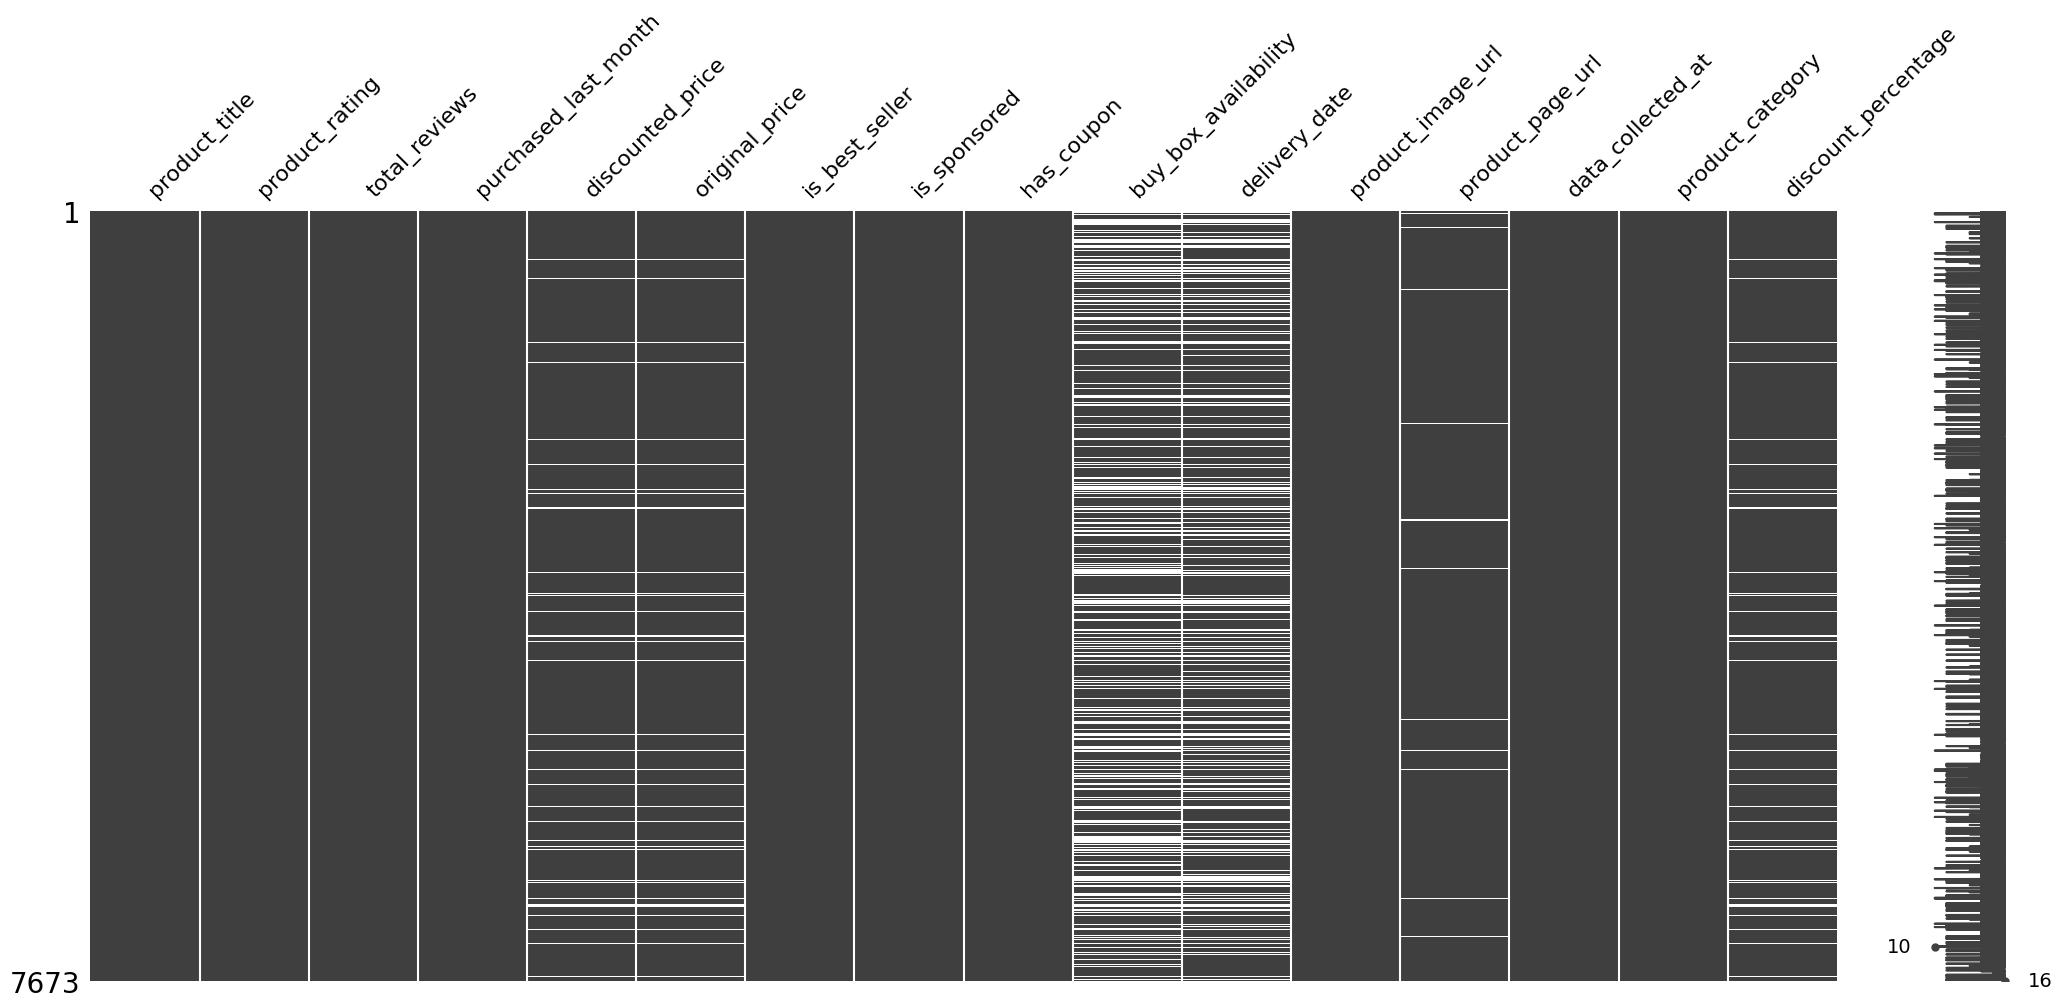

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         7673 non-null   object 
 1   product_rating        7673 non-null   float64
 2   total_reviews         7673 non-null   float64
 3   purchased_last_month  7673 non-null   float64
 4   discounted_price      7272 non-null   float64
 5   original_price        7272 non-null   float64
 6   is_best_seller        7673 non-null   object 
 7   is_sponsored          7673 non-null   object 
 8   has_coupon            7673 non-null   object 
 9   buy_box_availability  5243 non-null   object 
 10  delivery_date         5589 non-null   object 
 11  product_image_url     7673 non-null   object 
 12  product_page_url      7487 non-null   object 
 13  data_collected_at     7673 non-null   object 
 14  product_category      7673 non-null   object 
 15  discount_percentage  

In [ ]:
df.isna().sum()


,0
product_title,0
product_rating,0
total_reviews,0
purchased_last_month,0
discounted_price,401
original_price,401
is_best_seller,0
is_sponsored,0
has_coupon,0
buy_box_availability,2430


In [ ]:
!pip install ydata-profiling -q

In [ ]:
from ydata_profiling import ProfileReport

# Crear el reporte
profile = ProfileReport(df, title="Análisis Exploratorio de Datos", explorative=True)

# Mostrarlo en el notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

Optamos por eliminar las dos columnas de URL, ya que no nos servirá a menos que realicemos un análisis más profundo por ejemplo con web scraping

In [ ]:
df.drop('product_image_url', axis=1, inplace=True)
df.drop('product_page_url', axis=1, inplace=True)

Vemos que **buy_box_availability** es una constante por lo que no aporta nada de informacion la cual se quitara

In [ ]:
df.drop('buy_box_availability', axis=1, inplace=True)

buy_box_availability, product_page_url y product_image_url

# Tratamiento de errrores

###Numericos

In [ ]:
cols_num=df.select_dtypes(include='number').columns
cols_num

Index(['product_rating', 'total_reviews', 'purchased_last_month',
       'discounted_price', 'original_price', 'discount_percentage'],
      dtype='object')

In [ ]:
cols_num=df.select_dtypes(include='number').columns
for col in cols_num:
  df[col] = pd.to_numeric(df[col], errors='coerce') # texto -> NaN
  df[col] = df[col].where(pd.notnull(df[col]), None) # NaN -> Null


  if col == "total_reviews":  # Dominio
    df.loc[df[col] >15000, col] = None # rango lógico

<Axes: >

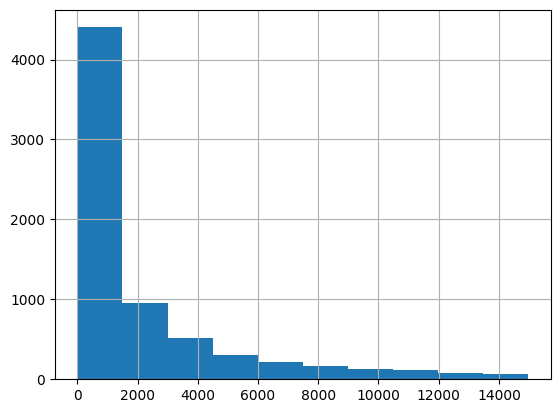

In [ ]:
df.total_reviews.hist()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7673 entries, 0 to 7672
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_title         7673 non-null   object 
 1   product_rating        7673 non-null   float64
 2   total_reviews         6958 non-null   float64
 3   purchased_last_month  7673 non-null   float64
 4   discounted_price      7272 non-null   float64
 5   original_price        7272 non-null   float64
 6   is_best_seller        7673 non-null   object 
 7   is_sponsored          7673 non-null   object 
 8   has_coupon            7673 non-null   object 
 9   delivery_date         5589 non-null   object 
 10  data_collected_at     7673 non-null   object 
 11  product_category      7673 non-null   object 
 12  discount_percentage   7272 non-null   float64
dtypes: float64(6), object(7)
memory usage: 779.4+ KB


###Fechas

In [ ]:
#formato estándar YYYY-MM-DD
#df["delivery_date"]=pd.to_datetime(df["delivery_date"], errors="coerce")  # dato erroneo -> Null

df["data_collected_at"] = pd.to_datetime(df["data_collected_at"])
df["delivery_date"] = pd.to_datetime(df["delivery_date"])

###Categoricos

In [ ]:
def clean_categorical(x):
    # Si es nulo, lo dejamos como None
    if pd.isna(x):
        return None                                                 #df["category"].fillna(None)
    # Si el valor es tipo int o float → lo marcamos como None
    if isinstance(x, (int, float)):
        return None
    # Si es string, limpiamos espacios y lo pasamos a minúsculas
    x = str(x).strip().lower()  #df['estado'].str.strip().str.lower()
    return x

In [ ]:
cols_cat=df.select_dtypes(include='object').columns
for col in cols_cat:
  df [col] = df[col].apply(clean_categorical)

#3) Load

In [ ]:
df.to_csv('/content/drive/MyDrive/A Automatico -cursada/TP1 Aprendizaje Automatico/TP1/Data/data_clean.csv', index=False)